# Optical Character Recognition (OCR) API demonstration

## Model creation

**IMPORTANT** : to convert the models, `pytorch` should be installed (GPU compatibility is **not** required) : `pip install torch`.

### Scene Text Detection model : EAST

The EAST scene-text detector is inspired from [this pytorch implementation](https://github.com/SakuraRiven/EAST). The pretrained weights file, `east_vgg16.pth` file, can be downloaded from the repo, then it should be placed it in the `pretrained_models/pretrained_weights` folder ! The below cell automatically converts the `pytorch` checkpoint to a `keras` instance. Check [the detection project](https://github.com/yui-mhcp/detection) for more examples about `EAST` ;)

In [2]:
from models.detection import EAST

detector = EAST(
    nom = 'east', labels = 'text', input_size = (None, None, 3)
)

print(detector)


========== east ==========
Model :
- Inputs 	: (None, None, None, 3)
- Outputs 	: (None, None, None, 6)
- Number of layers 	: 96
- Number of parameters 	: 15.099 Millions
- Model not compiled yet

Already trained on 0 epochs (0 steps)

- Image size : (None, None, 3)
- Resize config : {'antialias': True}
- Normalization schema : east
- Labels (n = 1) : ['text']



### OCR model : CRNN

The available pretrained models currently come from the `easyocr` open-source library. The library is however not required to be installed as only the checkpoint files are downloaded and converted into a `keras` model !

The full list of available languages / models available in the `custom_architectures/crnn_arch.py` file ;) By default, the below cell loads the `english` pretrained model.

In [3]:
from models.ocr import CRNN

model = CRNN(
    nom = 'crnn_en', lang = 'english', pretrained_lang = 'english'
)

print(model)
model.summary()

Deserializing `model` from config
`model` successfully restored !
Loading weights from `pretrained_models/crnn_en/saving/ckpt-0000.weights.h5`
CRNN `crnn_en` initialized successfully !

========== crnn_en ==========
Model :
- Inputs 	: (None, 64, None, 1)
- Outputs 	: (None, None, 97)
- Number of layers 	: 33
- Number of parameters 	: 3.778 Millions
- Model not compiled yet

Transfer-learning from : easyocr_english_g2
Already trained on 0 epochs (0 steps)

- Image size : (64, None, 1)
- Resize config : {'antialias': True, 'pad_mode': 'repeat_last', 'preserve_aspect_ratio': True, 'multiples': 64, 'interpolation': 'bilinear'}
- Normalization schema : easyocr
- Language : english
- Vocabulary (size = 97) : ['<blank>', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', ...]



Model: "CRNN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_image (InputLayer)        │ (None, 64, None, 1)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ zero_padding2d (ZeroPadding2D)  │ (None, 66, None, 1)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_0 (Conv2D)                 │ (None, 64, None, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ custom_activation               │ (None, 64, None, 32)   │             0 │
│ (CustomActivation)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 32, None, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ zero_padding2d_1                │ (None, 34, None, 32)   │             0 │
│ (ZeroPadding2D)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_3 (Conv2D)                 │ (None, 32, None, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ custom_activation_1             │ (None, 32, None, 64)   │             0 │
│ (CustomActivation)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 16, None, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ zero_padding2d_2                │ (None, 18, None, 64)   │             0 │
│ (ZeroPadding2D)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_6 (Conv2D)                 │ (None, 16, None, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ custom_activation_2             │ (None, 16, None, 128)  │             0 │
│ (CustomActivation)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ zero_padding2d_3                │ (None, 18, None, 128)  │             0 │
│ (ZeroPadding2D)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_8 (Conv2D)                 │ (None, 16, None, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ custom_activation_3             │ (None, 16, None, 128)  │             0 │
│ (CustomActivation)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 8, None, 128)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ zero_padding2d_4                │ (None, 10, None, 128)  │             0 │
│ (ZeroPadding2D)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_11 (Conv2D)                │ (None, 8, None, 256)   │       294,912 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ norm_12 (BatchNormalization)    │ (None, 8, None, 256)   │         1,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ custom_activation_4             │ (None, 8, None, 256)   │             0 │
│ (CustomActivation)              │                        │               │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 3,778,273 (14.41 MB)

 Trainable params: 3,777,249 (14.41 MB)

 Non-trainable params: 1,024 (4.00 KB)

## OCR Demonstration

To perform OCR on an image, simply provide the `filename`(s) of the image(s) to the `ocr` method! For a complete list of arguments and configurations, use `help(BaseOCR.predict)`.

Key parameters:
- `model`: Specifies which OCR model to use (e.g., the `crnn_en` instance created earlier)
- `detector`: Defines the text detection model to use (e.g., the `east` model created earlier)
- `combine`: Controls whether to combine detected boxes into lines (horizontal fusion) and paragraphs (vertical fusion) before performing character recognition

For example, with `combine=True`, the system would group "Severins" with "brücke" as a paragraph (two lines), while "Im" and "Sionstat" would be recognized as a single line. The OCR processing is performed on complete lines, while paragraphs simply represent grouped lines separated by newline characters ("\n").

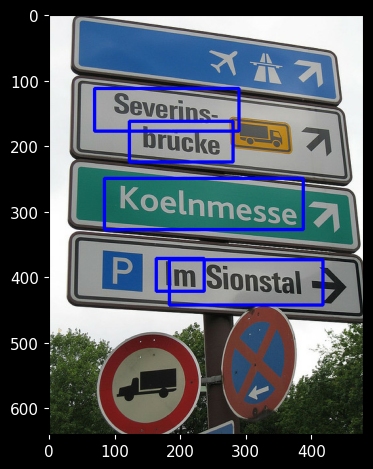

Text (score [-0.004]) : Im


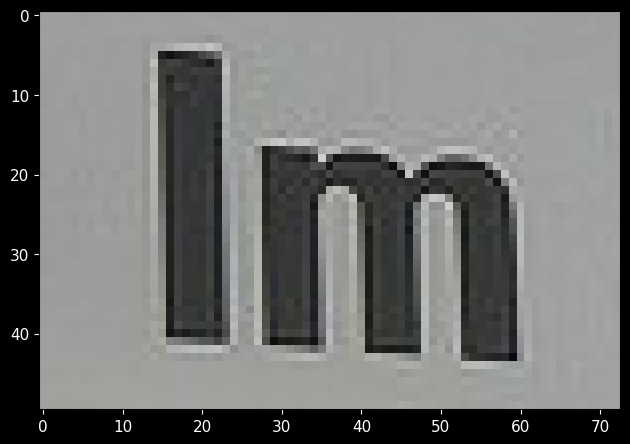

Text (score [-0.066]) : ~Severins- 


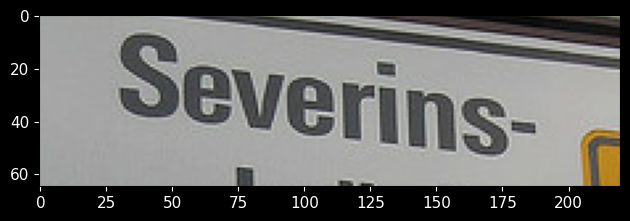

Text (score [-0.035]) : ~bricke =


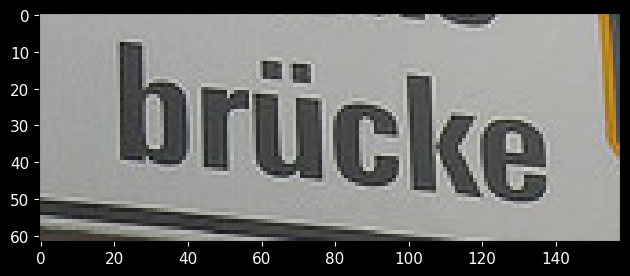

Text (score [-0.]) : Im Sionstal =


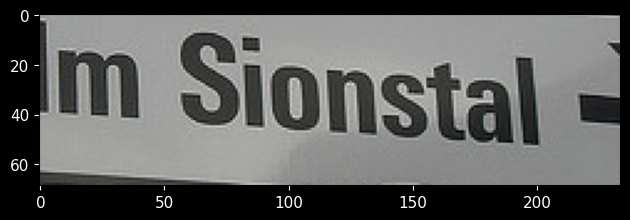

Text (score [-0.]) : Koelnmesse


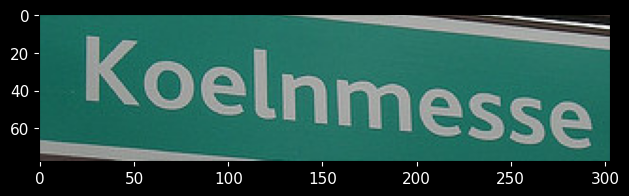

{'filename': 'text.jpg',
 'boxes': {'boxes': <tf.Tensor: shape=(5, 4), dtype=float32, numpy=
  array([[0.3408395 , 0.5819504 , 0.49288744, 0.6604507 ],
         [0.14430921, 0.17738646, 0.6030006 , 0.27896795],
         [0.25520554, 0.25616273, 0.5847182 , 0.3521244 ],
         [0.38144043, 0.58463186, 0.8696406 , 0.6931458 ],
         [0.17637306, 0.39144596, 0.8074587 , 0.51283205]], dtype=float32)>,
  'format': 'xyxy'},
 'ocr': [{'boxes': <tf.Tensor: shape=(4,), dtype=float32, numpy=array([0.3408395 , 0.5819504 , 0.49288744, 0.6604507 ], dtype=float32)>,
   'rows': <tf.Tensor: shape=(1, 4), dtype=float32, numpy=array([[0.3408395 , 0.5819504 , 0.49288744, 0.6604507 ]], dtype=float32)>,
   'text': 'Im',
   'format': 'xyxy',
   'scores': array([-0.00446855], dtype=float32)},
  {'boxes': <tf.Tensor: shape=(4,), dtype=float32, numpy=array([0.14430921, 0.17738646, 0.6030006 , 0.27896795], dtype=float32)>,
   'rows': <tf.Tensor: shape=(1, 4), dtype=float32, numpy=array([[0.14430921, 0.1773

In [5]:
from models.ocr import ocr

filename = 'text.jpg'

infos = ocr(filename, model = 'crnn_en', detector = 'east', save = False, display = True, combine = False)[0]
infos